In [20]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv, sum_hand

In [7]:
env = BlackjackEnv()

In [34]:
def print_observation(observation):
    score, dealer_score, usable_ace = observation
    print("Player Score: {} (Usable Ace: {}), Dealer Score: {}".format(
          score, usable_ace, dealer_score))

def strategy(observation, stick_score):
    score, dealer_score, usable_ace = observation
    # Stick (action 0) if the score is > stick_score, hit (action 1) otherwise
    return 0 if score >= stick_score else 1

def play(stick_score, episodes, print_game_details):
    rewards = []
    for i_episode in range(episodes):
        observation = env.reset()
        for t in range(100):
            if print_game_details:
                print_observation(observation)
            action = strategy(observation, stick_score=stick_score)
            if print_game_details:
                print("Taking action: {}".format( ["Stick", "Hit"][action]))

            # After the player sticks, the dealer draws until their sum is 17 or greater. 
            observation, reward, done, _ = env.step(action)

            if done:
                if print_game_details:
                    print_observation(observation)
                    print("Game end. Dealer sum: {}, Reward: {}\n".format(sum_hand(env.dealer), float(reward)))
                rewards.append(reward)
                break
    if print_game_details:
        print('Total reward after {} episodes: {}'.format(episodes, sum(rewards)))
    return sum(rewards)

In [48]:
rewards = play(stick_score=17, episodes=20, print_game_details=True)

Player Score: 15 (Usable Ace: False), Dealer Score: 7
Taking action: Hit
Player Score: 23 (Usable Ace: False), Dealer Score: 7
Game end. Dealer sum: 17, Reward: -1.0

Player Score: 17 (Usable Ace: True), Dealer Score: 4
Taking action: Stick
Player Score: 17 (Usable Ace: True), Dealer Score: 4
Game end. Dealer sum: 21, Reward: -1.0

Player Score: 16 (Usable Ace: True), Dealer Score: 7
Taking action: Hit
Player Score: 20 (Usable Ace: True), Dealer Score: 7
Taking action: Stick
Player Score: 20 (Usable Ace: True), Dealer Score: 7
Game end. Dealer sum: 19, Reward: 1.0

Player Score: 17 (Usable Ace: False), Dealer Score: 10
Taking action: Stick
Player Score: 17 (Usable Ace: False), Dealer Score: 10
Game end. Dealer sum: 18, Reward: -1.0

Player Score: 14 (Usable Ace: False), Dealer Score: 3
Taking action: Hit
Player Score: 24 (Usable Ace: False), Dealer Score: 3
Game end. Dealer sum: 13, Reward: -1.0

Player Score: 21 (Usable Ace: False), Dealer Score: 4
Taking action: Stick
Player Score: 2

The best strategy for playing is stick after 15, the reward is -603


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


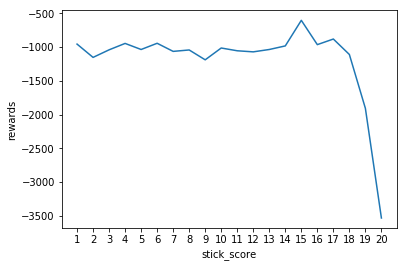

In [45]:
rewards_list = list()

for i in range(1, 21):
    rewards = play(stick_score=i, episodes=10000, print_game_details=False)
    rewards_list.append(rewards)
    
print('The best strategy for playing is stick after {}, the reward is {}'.format(np.argmax(rewards_list)+1, max(rewards_list)))
fig, ax = plt.subplots()

ax.plot(range(1, 21), rewards_list)
ax.set_xlabel('stick_score')
ax.set_ylabel('rewards')

ax.set_xticks(range(1, 21))

fig.show()